For Research Question 1: Which countries dominate and are most central in the global transfer market based on the nationality of the transferred players? 

C:\Users\14037\AppData\Local\Temp\ipykernel_21584\1924970778.py:104: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_top10 = df_nationality_centrality.groupby("Year").apply(lambda x: x.nlargest(10, "Betweenness Centrality")).reset_index(drop=True)


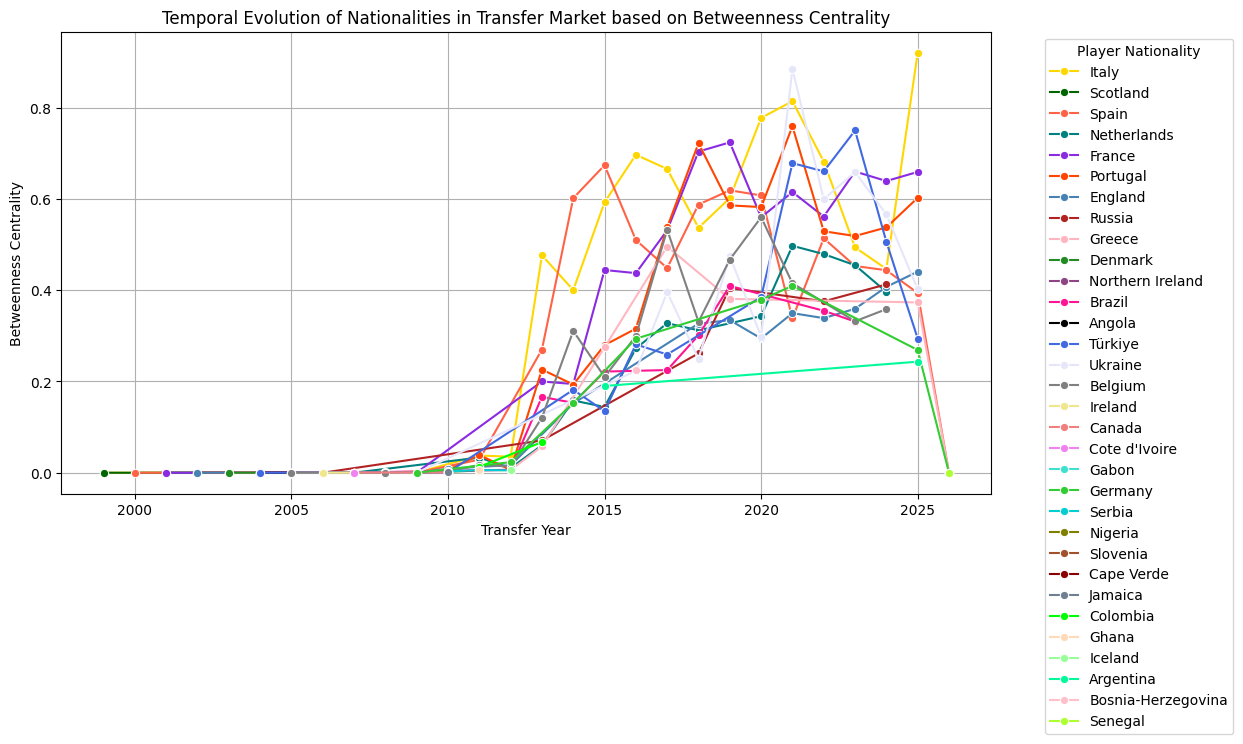

In [1]:
#importing libraries 
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

#reading data from excel dataset
df = pd.read_excel("Transfer-Players-Clubs.xlsx")  

#converting transfer date to datetime and extracting year 
df["transfer_date"] = pd.to_datetime(df["transfer_date"], errors="coerce")  
df["transfer_year"] = df["transfer_date"].dt.year  

#dropping those rows with invalid data
df = df.dropna(subset=["transfer_year"])

#dictionary for betweeness centrality values 
nationality_centrality = {}

#hardcoded color values for each country 
country_colors = {
    "Spain": "#FF6347",   
    "England": "#4682B4", 
    "Germany": "#32CD32", 
    "Italy": "#FFD700",   
    "France": "#8A2BE2",  
    "Brazil": "#FF1493",  
    "Argentina": "#00FA9A", 
    "Portugal": "#FF4500",  
    "Netherlands": "#008080", 
    "Belgium": "#808080",    
    "Sweden": "#DC143C",     
    "Uruguay": "#FF8C00",    
    "Cote d'Ivoire": "#EE82EE", 
    "Canada": "#F08080",   
    "Croatia": "#A52A2A",  
    "Cape Verde": "#8B0000", 
    "Türkiye": "#4169E1",    
    "Denmark": "#228B22",   
    "Ghana": "#FFDAB9",      
    "Morocco": "#C71585",    
    "Senegal": "#ADFF2F",    
    "Russia": "#B22222",     
    "Serbia": "#00CED1",     
    "Ukraine": "#E6E6FA",   
    "Algeria": "#800000",    
    "Nigeria": "#808000",   
    "Venezuela": "#0000FF",  
    "Scotland": "#006400" ,   
    "Slovenia":"#A0522D",
    "Northern Ireland":"#8E4585", 
    "Greece":"#FFB6C1", 
    "Ireland":"#F0E68C",
    "Gabon":"#40E0D0",
    "Angola":"#000000",
    "Iceland":"#98FF98",
    "Jamaica":"#708090",
    "Chile":"#800020",
    "Colombia":"#00FF00",
    "Bosnia-Herzegovina":"#FFC0CB"
}

#for loop for looping through each transfer year
for year in sorted(df["transfer_year"].unique()):
    
    G = nx.DiGraph()  
    year_data = df[df["transfer_year"] == year]
    
    #for loop for creating edges from selling club to buying club
    for _, row in year_data.iterrows():
        from_club = row["from_club_name"]
        to_club = row["to_club_name"]
        player_nationality = row["country_of_citizenship"]
        G.add_edge(from_club, to_club)

    #calculating betweeness centrality 
    centrality = nx.betweenness_centrality(G)
    
    #initialzing dict for current year to store aggregated betweeness centrality
    nationality_centrality[year] = {}
    
    for _, row in year_data.iterrows():
        club = row["from_club_name"]
        player_nationality = row["country_of_citizenship"]
        
        #getting centrality for each club
        club_centrality = centrality.get(club, 0)
        
        #check if player nationality already exists in dict for curent year 
        if player_nationality not in nationality_centrality[year]:
            #intialize it to zero if not present in dict
            nationality_centrality[year][player_nationality ] = 0
        
        #adds club centrality to player nationality for current year
        nationality_centrality[year][player_nationality] += club_centrality

#convert results to dataframe 
df_nationality_centrality = pd.DataFrame([{
    "Year": year, "Player Nationality": nationality, "Betweenness Centrality": centrality} 
    for year, countries in nationality_centrality.items() 
    for nationality, centrality in countries.items()])

#chooses top 10 nationalities per year with high betweenness centrality values 
df_top10 = df_nationality_centrality.groupby("Year").apply(lambda x: x.nlargest(10, "Betweenness Centrality")).reset_index(drop=True)

#plotting time series plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_top10, x="Year", y="Betweenness Centrality", hue="Player Nationality", marker="o", palette=country_colors)
plt.xlabel("Transfer Year")
plt.ylabel("Betweenness Centrality")
plt.title("Temporal Evolution of Nationalities in Transfer Market based on Betweenness Centrality")
plt.legend(title="Player Nationality", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.show()
